# Project: Reatail Sales 

# 🛍️ Reatail Sales Analysis Project
This end-to-end data analysis project explores a comprehensive retail sales dataset to extract actionable insights that support strategic decision-making. The analysis focuses on understanding customer behavior, optimizing store operations, and identifying sales patterns to boost business performance. 

#### Key Business Questions Addressed:

1- Find the top-selling products and least-performing ones

2- Identify peak sales months and seasonal trends

3- Analyze customer demographics (age, gender, membership level)

4- Determine the impact of discounts on sales


We'll use Python with `pandas`, `matplotlib`, and `seaborn` for analysis and visualization.


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring And Assessing Data :

In [5]:
data = pd.read_csv("complex_retail_sales_data.csv")

In [77]:
data.head()

,Customer ID,Customer Age,Customer Gender,Membership Status,Product Name,Category,Quantity Sold,Unit Price,Discount Applied (%),Total Sales,Payment Method,Store Location,months,year
0,6097,65,Non-Binary,Regular,Blender,Home & Kitchen,7,203,15,1205,Credit Card,Miami,2,2025
1,9436,47,Non-Binary,Gold,Smartphone,Electronics,10,725,5,6884,PayPal,Chicago,8,2024
2,6067,62,Female,Regular,Yoga Mat,Sports,9,647,5,5533,PayPal,Houston,5,2024
3,4242,46,Non-Binary,Regular,Headphones,Electronics,3,802,0,2407,PayPal,Miami,11,2023
4,2774,75,Non-Binary,Platinum,Vacuum Cleaner,Home & Kitchen,5,74,10,335,Cash,New York,12,2022


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction ID        1000 non-null   object        
 1   Date                  1000 non-null   datetime64[ns]
 2   Customer ID           1000 non-null   int64         
 3   Customer Age          1000 non-null   int64         
 4   Customer Gender       1000 non-null   object        
 5   Membership Status     1000 non-null   object        
 6   Product Name          1000 non-null   object        
 7   Category              1000 non-null   object        
 8   Quantity Sold         1000 non-null   int64         
 9   Unit Price            1000 non-null   int32         
 10  Discount Applied (%)  1000 non-null   int64         
 11  Total Sales           1000 non-null   int32         
 12  Payment Method        1000 non-null   object        
 13  Store Location     

In [19]:
data.describe()

,Customer ID,Customer Age,Quantity Sold,Unit Price,Discount Applied (%),Total Sales
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5452.57500,46.132000,5.497000,495.994470,10.055000,2403.487840
std,2579.75199,17.211531,2.926526,282.220699,6.994347,1984.142164
min,1006.00000,18.000000,1.000000,6.250000,0.000000,5.950000
25%,3191.00000,31.000000,3.000000,256.270000,5.000000,746.542500
50%,5404.50000,46.000000,5.000000,495.555000,10.000000,1869.635000
75%,7571.00000,62.000000,8.000000,731.495000,15.000000,3584.252500
max,9987.00000,75.000000,10.000000,999.660000,20.000000,9438.400000


In [20]:
data.isnull().sum()

Transaction ID          0
Date                    0
Customer ID             0
Customer Age            0
Customer Gender         0
Membership Status       0
Product Name            0
Category                0
Quantity Sold           0
Unit Price              0
Discount Applied (%)    0
Total Sales             0
Payment Method          0
Store Location          0
dtype: int64

## Cleaning Data :

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data['Unit Price'] = data['Unit Price'].round().astype('int')

In [8]:
data['Total Sales'] = data['Total Sales'].round().astype('int')

In [9]:
data.drop(columns ='Transaction ID', inplace  = True)

In [10]:
data['months'] = data['Date'].dt.month
data['months']

0       2
1       8
2       5
3      11
4      12
       ..
995    10
996     7
997     2
998     2
999    11
Name: months, Length: 1000, dtype: int32

In [11]:
data['year'] = data['Date'].dt.year
data['year']

0      2025
1      2024
2      2024
3      2023
4      2022
       ... 
995    2024
996    2022
997    2023
998    2025
999    2022
Name: year, Length: 1000, dtype: int32

In [12]:
data.drop(columns='Date', inplace=True)

# Answering Questions

### First Q : -Find the top-selling products and least-performing ones

In [163]:
product_sales = data.groupby('Product Name',as_index=False)['Total Sales'].sum()

In [164]:
top_5 = product_sales.sort_values(by='Total Sales', ascending=False).head(5)

In [165]:
least_5 = product_sales.sort_values(by='Total Sales').head(5)

In [166]:
print("TOP 5 SELLING PRODUCTS : ", top_5)

TOP 5 SELLING PRODUCTS :      Product Name  Total Sales
9         Laptop       123400
7         Jacket       122805
8          Jeans       119301
1   Coffee Maker       117599
14    Remote Car       115570


In [167]:
print("LEAST 5 SELLING PRODUCTS : ", least_5)

LEAST 5 SELLING PRODUCTS :        Product Name  Total Sales
2             Doll        70473
21   Tennis Racket        72469
3        Dumbbells        81263
22  Vacuum Cleaner        85693
5         Football        91917


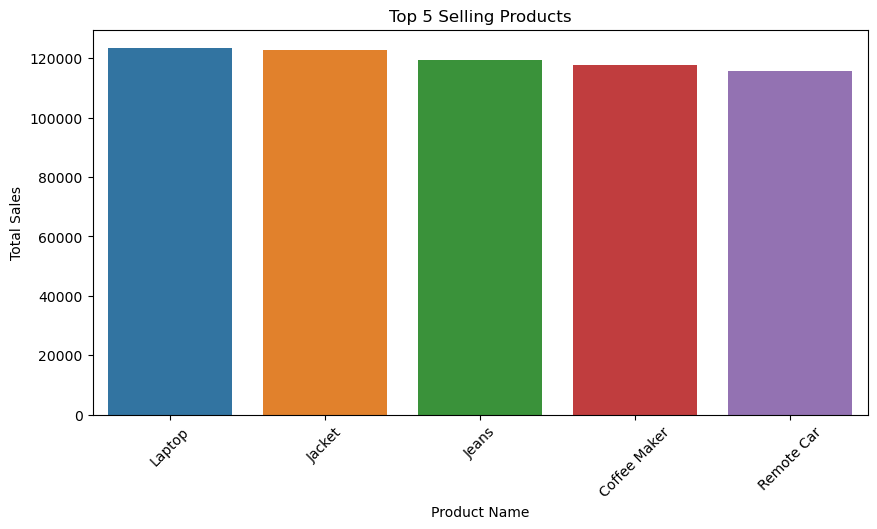

In [168]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5, x='Product Name', y="Total Sales")

plt.title("Top 5 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Sec Q : -Identify peak sales months and seasonal trends


In [93]:
month_total_sales = data.groupby(['months','year'])['Total Sales'].sum()

In [94]:
top_5_months = month_total_sales.sort_values(ascending=False).head(5)

In [95]:
top_5_months

months  year
2       2023    115415
5       2023     97142
10      2023     93777
8       2023     93525
5       2022     92567
Name: Total Sales, dtype: int32

C:\Users\Eslam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eslam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


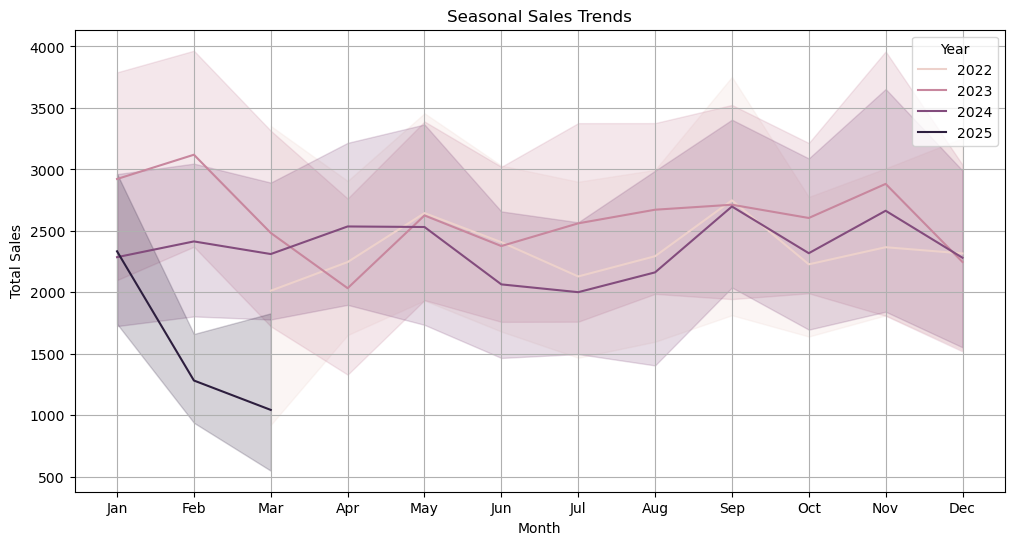

In [99]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='months', y='Total Sales', hue='year')

plt.title("Seasonal Sales Trends")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.show()

### Third Q : -Analyze customer demographics (age, gender, membership level)

In [102]:
age_sales = data.groupby('Customer Age')['Total Sales'].sum()

In [104]:
top_5_ages = age_sales.sort_values(ascending = False).head(5)
top_5_ages

Customer Age
64    72663
62    70849
37    68210
20    61552
26    55962
Name: Total Sales, dtype: int32

In [114]:
gender_sales = data.groupby('Customer Gender')['Total Sales'].sum()

In [115]:
top_5_genders = gender_sales.sort_values(ascending=False)
top_5_genders

Customer Gender
Female        841222
Male          812276
Non-Binary    750000
Name: Total Sales, dtype: int32

In [109]:
Membership_sales = data.groupby('Membership Status')['Total Sales'].sum()

In [111]:
top_Membership_Status = Membership_sales.sort_values(ascending = False)
top_Membership_Status

Membership Status
Regular     637821
Gold        614444
Silver      599501
Platinum    551732
Name: Total Sales, dtype: int32

### Fourth Q : -Determine the impact of discounts on sales


In [140]:
diss_count = data['Discount Applied (%)'].value_counts()

In [141]:
discount = data.groupby('Discount Applied (%)')['Total Sales'].sum()

In [143]:
sort_diss = discount.sort_values(ascending=False)
sort_diss

Discount Applied (%)
15    553924
0     539882
5     471758
10    470024
20    367910
Name: Total Sales, dtype: int32

In [145]:
sort_discount = diss_count.sort_values(ascending=False)
sort_discount

Discount Applied (%)
15    232
0     202
10    200
5     183
20    183
Name: count, dtype: int64

In [174]:
category_sales = data.groupby('Category')['Total Sales'].sum()

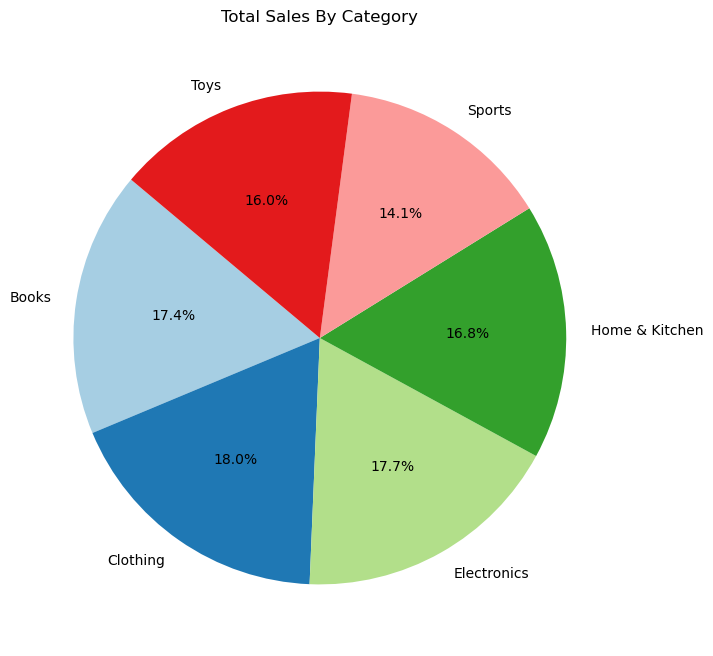

In [175]:
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title("Total Sales By Category")
plt.show()

In [176]:
location_sales = data.groupby('Store Location')['Total Sales'].sum()

In [181]:
numeric_df = data.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

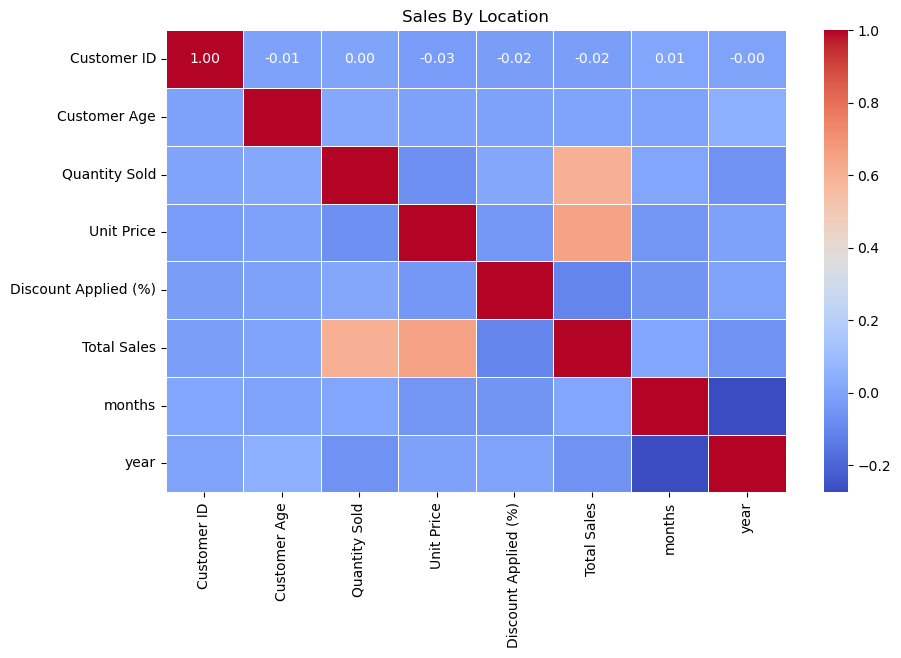

In [182]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Sales By Location")
plt.show()

# 3-5 key insights from the analysis

#### 1- That electronics and fashion has the top 5 selling products

#### 2- That 2023 year, month 2 has the highst selling records 

#### 3- that people between the age 60 and 65 has the highst selling records 

#### 4- Female gender has also the most buying records

#### 5- Reguler membership has more sales than the other memberships 